In [21]:
import numpy as np
import math

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
import pytz

from astroplan import Observer, FixedTarget
import matplotlib.pyplot as plt

import glob
from scipy.optimize import curve_fit

import astropy.io.fits as fits

In [22]:
Bias_1 = "./Data/CCD Data/bias1.FIT"

my_fits_file = fits.open(Bias_1) 
my_fits_file.info()
image_data = my_fits_file[0].data
image_header = my_fits_file[0].header

Filename: ./Data/CCD Data/bias1.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2184, 1472)   int16 (rescales to uint16)   


In [23]:
Bias_image_1 = fits.getdata('./Data/CCD Data/bias1.FIT').astype(np.int32)
print(Bias_image_1.shape)
print('')
print(Bias_image_1)

(1472, 2184)

[[1157 1196 1164 ... 1157 1142 1149]
 [1177 1158 1164 ... 1155 1150 1154]
 [1161 1159 1148 ... 1138 1133 1130]
 ...
 [1152 1178 1186 ... 1152 1166 1153]
 [1167 1187 1183 ... 1182 1146 1147]
 [1154 1146 1176 ... 1186 1149 1181]]


The number of pixels is 3214848.000.
The mean is 1153.078 and the STD 27.839.


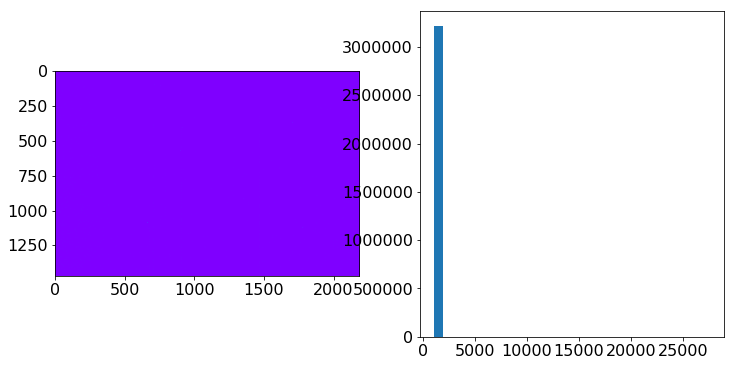

In [24]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

image = image_data

ax[0].imshow(image,cmap=plt.cm.rainbow) 

ax[1].hist(image.flatten(),bins=30);

print("The number of pixels is {0:.3f}.".format(image.size))
print("The mean is {0:.3f} and the STD {1:.3f}.".format(np.mean(image),(np.std(image))))

In [25]:
flat1 = fits.getdata('./Data/CCD Data/18_sec.FIT').astype(np.int32)
flat2 = fits.getdata('./Data/CCD Data/42_sec.FIT').astype(np.int32)
bias1 = fits.getdata('./Data/CCD Data/bias1.FIT').astype(np.int32)
bias2 = fits.getdata('./Data/CCD Data/bias2.FIT').astype(np.int32)

In [26]:
mean_f1 = np.mean(flat1)
#print(mean_f1)

mean_f2 = np.mean(flat2)
#print(mean_f2)

mean_b1 = np.mean(bias1)
#print(mean_b1)

mean_b2 = np.mean(bias2)
#print(mean_b2)

sigma_f1f2 = np.std(flat1 - flat2)
#print(sigma_f1f2)

sigma_b1b2 = np.std(bias1 - bias2)
#print(sigma_b1b2)

gain = ((mean_f1 + mean_f2) - (mean_b1 + mean_b2))/(sigma_f1f2**2 - sigma_b1b2**2)
#print(gain)

print("The mean for flatfield image 1 is {0:.3f}.".format(mean_f1))
print("The mean for flatfield image 2 is {0:.3f}.".format(mean_f2))
print("The mean for bias image 1 is {0:.3f}.".format(mean_b1))
print("The mean for bias image 2 is {0:.3f}.".format(mean_b2))
print("The gain for these images is {0:.3f} e-/ADU.".format(gain))

The mean for flatfield image 1 is 28975.716.
The mean for flatfield image 2 is 56429.006.
The mean for bias image 1 is 1153.078.
The mean for bias image 2 is 1153.246.
The gain for these images is 0.085 e-/ADU.


In [27]:
# Now to calculate for the Read Noise!
read_noise = (gain*sigma_b1b2)/(math.sqrt(2))
print("The read noise is {0:.3f} e-.".format(read_noise))

The read noise is 1.163 e-.


In [9]:
row0 = 100
row1 = 200
colm0 = 200
colm1 = 300

# This is called taking a 'slice' of the array, i.e. a subregion
sub_image = Bias_image_1[row0:row1, colm0:colm1]

print(sub_image.shape)
print('')
print(sub_image)

(100, 100)

[[1152 1119 1166 ... 1135 1149 1171]
 [1146 1159 1172 ... 1170 1150 1157]
 [1157 1171 1189 ... 1168 1149 1158]
 ...
 [1164 1152 1142 ... 1150 1157 1139]
 [1151 1137 1159 ... 1156 1139 1152]
 [1157 1165 1159 ... 1125 1147 1169]]


In [21]:
row0 = 100
row1 = 200
colm0 = 200
colm1 = 300

sub_mean_f1 = np.mean(flat1[row0:row1, colm0:colm1])
print("The sub_mean_f1 is {0:.3f}.".format(sub_mean_f1))

sub_mean_f2 = np.mean(flat2[row0:row1, colm0:colm1])
print("The sub_mean_f2 is {0:.3f}.".format(sub_mean_f2))

sub_mean_b1 = np.mean(bias1[row0:row1, colm0:colm1])
print("The sub_mean_b1 is {0:.3f}.".format(sub_mean_b1))

sub_mean_b2 = np.mean(bias2[row0:row1, colm0:colm1])
print("The sub_mean_b2 is {0:.3f}.".format(sub_mean_b2))

sub_sigma_f1f2 = np.std((flat1 - flat2)[row0:row1, colm0:colm1])
print("The sub_sigma_f1f2 is {0:.3f}.".format(sub_sigma_f1f2))

sub_sigma_b1b2 = np.std((bias1 - bias2)[row0:row1, colm0:colm1])
print("The sub_sigma_b1b2 is {0:.3f}.".format(sub_sigma_b1b2))

sub_gain = (((sub_mean_f1 + sub_mean_f2) - (sub_mean_b1 + sub_mean_b2))/(sub_sigma_f1f2**2 - sub_sigma_b1b2**2))
print("The sub_gain is {0:.3f}.".format(sub_gain))


sub_read_noise = (sub_gain*sub_sigma_b1b2)/(math.sqrt(2))
print("The sub_read_noise is {0:.3f}.".format(sub_read_noise))


The sub_mean_f1 is 26875.450.
The sub_mean_f2 is 55338.521.
The sub_mean_b1 is 1156.258.
The sub_mean_b2 is 1156.665.
The sub_sigma_f1f2 is 217.113.
The sub_sigma_b1b2 is 18.976.
The sub_gain is 1.708.
The sub_read_noise is 22.919.


In [23]:
def calculate_gain(flat_1, flat_2, bias_1, bias_2):
    """
    Calculate detector gain given two flat frames and two bias frames.
    
    Parameters
    ----------
    flat_1, flat_2 : numpy.array_like
        The flat frames
    bias_1, bias_2 : numpy.array_like
        The bias frames
        
    Returns
    -------
    gain : float
        The detector gain
    """
    # This is Equation 3 from the assignment
    numerator = (np.mean(flat_1) + np.mean(flat_2)) - (np.mean(bias_1) + np.mean(bias_2))
    denominator = np.std((flat_1 - flat_2)) ** 2 - np.std((bias_1 - bias_2)) ** 2
    gain = numerator / denominator
    
    return gain

In [27]:
flat_1 = fits.getdata('./Data/CCD Data/18_sec.FIT').astype(np.int32)
flat_2 = fits.getdata('./Data/CCD Data/42_sec.FIT').astype(np.int32)
bias_1 = fits.getdata('./Data/CCD Data/bias1.FIT').astype(np.int32)
bias_2 = fits.getdata('./Data/CCD Data/bias2.FIT').astype(np.int32)

calculate_gain(flat_1, flat_2, bias_1, bias_2)

0.08484912675650327

In [32]:
row_bins = np.linspace(0, flat_1.shape[0], 5).astype(int)
print(row_bins)
col_bins = np.linspace(0, flat_1.shape[1], 10).astype(int)
print(col_bins)

[   0  368  736 1104 1472]
[   0  242  485  728  970 1213 1456 1698 1941 2184]


In [33]:
# This is an array to store the gain in each subregion.
gain_map = np.zeros((len(row_bins) - 1, len(col_bins - 1)))

# This nested for loop goes through each subregion.
for ii in range(len(row_bins) - 1):
    for jj in range(len(col_bins) - 1):
        row_slice = slice(row_bins[ii], row_bins[ii + 1])
        col_slice = slice(col_bins[jj], col_bins[jj + 1])
        
        # The `local_gain` is the gain in the subregion
        local_gain = calculate_gain(flat_1[row_slice, col_slice], flat_2[row_slice, col_slice],
                                    bias_1[row_slice, col_slice], bias_2[row_slice, col_slice])
        
        # Store the local gain in the `gain_map`
        gain_map[ii, jj] = local_gain

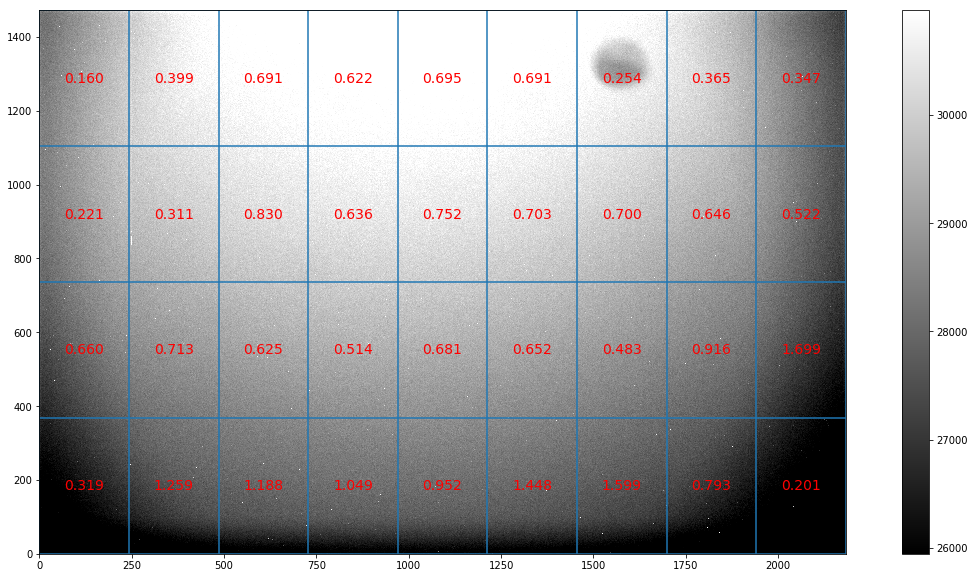

In [34]:
plt.figure(figsize=(20, 10))

# Use the imshow function to plot one of the flat images for reference.
plt.imshow(flat_1, vmin=np.percentile(flat_1, 5), vmax=np.percentile(flat_1, 90),
           origin='lower', cmap='binary_r', interpolation='nearest')


# Plot the boundaries of the subregions
for row in row_bins:
    plt.axhline(row)
for col in col_bins:
    plt.axvline(col)

# Print the local gain value in each subregion
for ii in range(len(row_bins) - 1):
    for jj in range(len(col_bins) - 1):
        row_loc = (row_bins[ii] + row_bins[ii + 1]) / 2
        col_loc = (col_bins[jj] + col_bins[jj + 1]) / 2
        
        plt.text(col_loc, row_loc, '{:.3f}'.format(gain_map[ii, jj]),
                 ha='center', va='center', fontsize=14, color='r')

plt.xlim(0, col_bins[-1])
plt.ylim(0, row_bins[-1])

# Add a colorbar
plt.colorbar()
plt.show()

In [35]:
a = np.array([1], dtype=np.uint16)
b = np.array([3], dtype=np.uint16)

print('a =', a)
print('b =', b)
print('a - b =', a - b)

a = [1]
b = [3]
a - b = [65534]


In [36]:
a = a.astype(np.int32)
b = b.astype(np.int32)

print('a =', a)
print('b =', b)
print('a - b =', a - b)

a = [1]
b = [3]
a - b = [-2]


In [2]:
# Linearity of the CCD
hdu = fits.open('./Data/CCD Data/24_sec.FIT')
header = hdu[0].header
print(header['exptime'])

24.0


In [9]:
# This is equivalent to $ ls Flat*.fits
flat_list = glob.glob('./Data/CCD Data/*sec.FIT')
print(flat_list)

['./Data/CCD Data\\-185_sec.FIT', './Data/CCD Data\\-375_sec.FIT', './Data/CCD Data\\-75_sec.FIT', './Data/CCD Data\\1-5_sec.FIT', './Data/CCD Data\\12_sec.FIT', './Data/CCD Data\\15_sec.FIT', './Data/CCD Data\\18_sec.FIT', './Data/CCD Data\\24_sec.FIT', './Data/CCD Data\\30_sec.FIT', './Data/CCD Data\\36_sec.FIT', './Data/CCD Data\\3_sec.FIT', './Data/CCD Data\\42_sec.FIT', './Data/CCD Data\\48_sec.FIT', './Data/CCD Data\\54_sec.FIT', './Data/CCD Data\\60_sec.FIT', './Data/CCD Data\\6_sec.FIT', './Data/CCD Data\\80_sec.FIT']


In [10]:
# These are empty lists (arrays) to store the exposure times and mean counts
exp_times = []
means = []

for filename in flat_list:
    # Open the FITS file
    hdu = fits.open(filename)
    
    exptime = hdu[0].header['exptime']
    print('Exposure time {} sec'.format(exptime))
    
    # This will append the exposure time for each image to the array
    exp_times.append(exptime)
    
    # Same for mean counts
    mean_counts = np.mean(hdu[0].data)
    print('Mean counts: {:.2f}\n'.format(mean_counts))
    means.append(mean_counts)

# Convert to Numpy arrays so they can be sorted
exp_times = np.array(exp_times)
means = np.array(means)

# Sort by exposure time so the plot looks correct
time_sort = np.argsort(exp_times)
exp_times = exp_times[time_sort]
means = means[time_sort]

Exposure time 0.185 sec
Mean counts: 1413.65

Exposure time 0.375 sec
Mean counts: 1673.31

Exposure time 0.75 sec
Mean counts: 2192.44

Exposure time 1.5 sec
Mean counts: 3174.87

Exposure time 12.0 sec
Mean counts: 18178.72

Exposure time 15.0 sec
Mean counts: 23983.32

Exposure time 18.0 sec
Mean counts: 28975.72

Exposure time 24.0 sec
Mean counts: 36629.32

Exposure time 30.0 sec
Mean counts: 45259.31

Exposure time 36.0 sec
Mean counts: 52164.65

Exposure time 3.0 sec
Mean counts: 5353.18

Exposure time 42.0 sec
Mean counts: 56429.01

Exposure time 48.0 sec
Mean counts: 57330.16

Exposure time 54.0 sec
Mean counts: 57626.20

Exposure time 60.0 sec
Mean counts: 57723.53

Exposure time 6.0 sec
Mean counts: 9578.54

Exposure time 80.0 sec
Mean counts: 57786.30



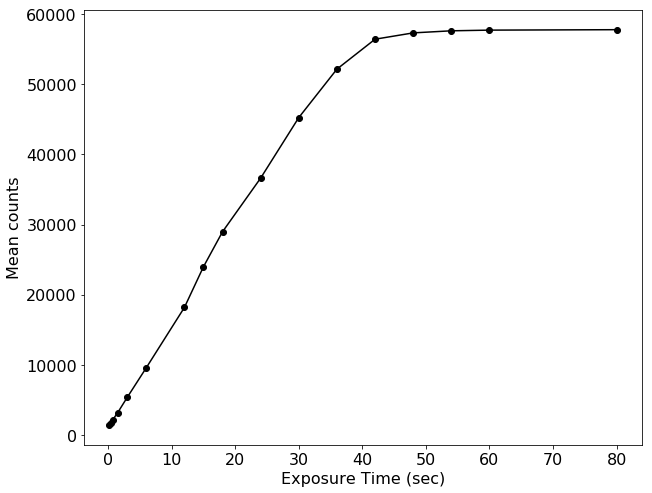

In [11]:
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(exp_times, means, '-ko')
plt.xlabel('Exposure Time (sec)')
plt.ylabel('Mean counts')
plt.show()

In [13]:
#Silicon Band Gap Energy
t_cel = np.array([-15., -10., -8., -6., -4.2, -2.3, 0., 2., 
                3.6, 5.8, 8.2, 10., 12.8, 16.2, 20.])
adu = np.array([13, 15, 16, 17, 19, 22, 24, 28, 32, 37, 
                43, 50, 62, 89, 139])

In [28]:
t_kel = t_cel + 273.15
print(t_kel)

[258.15 263.15 265.15 267.15 268.95 270.85 273.15 275.15 276.75 278.95
 281.35 283.15 285.95 289.35 293.15]


In [29]:
electrons = adu * 2.3 ## gain for the SBIG ST-8XE detector
print(electrons)

[ 29.9  34.5  36.8  39.1  43.7  50.6  55.2  64.4  73.6  85.1  98.9 115.
 142.6 204.7 319.7]


In [30]:
electrons_per_sec = electrons/120 # 120 sec = 2 minute exposures 
print(electrons_per_sec)

[0.24916667 0.2875     0.30666667 0.32583333 0.36416667 0.42166667
 0.46       0.53666667 0.61333333 0.70916667 0.82416667 0.95833333
 1.18833333 1.70583333 2.66416667]


In [35]:
## Fit for the band gap energy
## We will try to fit a model for dark current of the form


# The Boltzmann constant
k_b = 8.6175e-5

def dark_current(t_k, alpha, e_g):
    """
    Analytic expression for dark current as a function of temperature.
    
    Parameters
    ----------
    t_k : numpy.ndarray
        Temperature in Kelvin
    alpha : float
        Constant coefficient in front of exponential funtion.
    e_g : float
        Band gap energy in eV.
    
    Returns
    -------
    dark_current : numpy.ndarray
        Dark current in electrons/pixel/second.
    """
    dark_current = alpha * np.exp(-e_g / (2 * k_b * t_k))
    return dark_current

In [36]:
# Initial guesses for parameters
t_0 = t_kel[-1]
d_0 = electrons_per_sec[-1]

alpha_0 =  d_0 / np.exp(-1.1 / (2 * k_b * t_0))
e_g_0 = 1.1

In [38]:
# Least square fit
p_opt, p_cov = curve_fit(dark_current, t_kel, electrons_per_sec, p0=[alpha_0, e_g_0])

# Errors in the fit
sig_alpha, sig_e_g = np.sqrt(np.diag(p_cov))

In [40]:
# Best values
alpha_fit, e_g_fit = p_opt
print(alpha_fit)
print(e_g_fit)
print(dark_current(273, alpha_fit, e_g_fit))

77098890315.08922
1.2205226715426334
0.4182142512933805


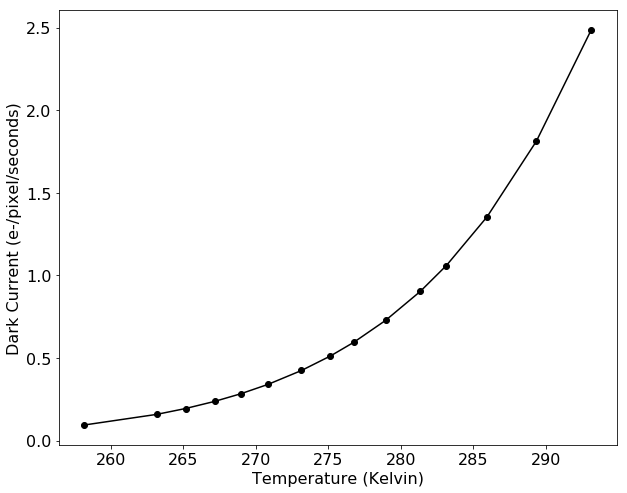

In [41]:
# Plot the data and best fit model
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(t_kel, dark_current(t_kel, alpha_fit, e_g_fit), '-ko')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Dark Current (e-/pixel/seconds)')
plt.show()

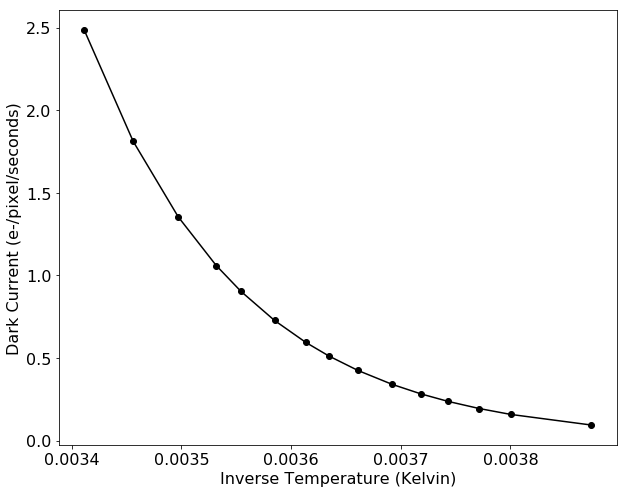

In [42]:
# inverse temperature
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = 16

plt.plot(1/t_kel, dark_current(t_kel, alpha_fit, e_g_fit), '-ko')
plt.xlabel('Inverse Temperature (Kelvin)')
plt.ylabel('Dark Current (e-/pixel/seconds)')
plt.show()